In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
### CARGA Y PREPARACIÓN
df_tendencias = pd.read_csv('../datos/datos_tendencias_20_IAs.csv')
df_tendencias['fecha'] = pd.to_datetime(df_tendencias['fecha'])

# A formato Long
df_long = df_tendencias.melt(
    id_vars = ['fecha'],
    var_name = 'ia',
    value_name = 'tendencia'
)

# Eliminar NaN provenientes de la unión inicial
df_long.dropna(subset=['tendencia'], inplace=True)

In [7]:
### Integrración fechas lanzamiento
datos_lanzamiento = {
    'ia': ['ChatGPT', 'Gemini', 'Claude', 'Midjourney', 'DALL-E', 'Stable Diffusion', 
           'Perplexity', 'Llama', 'Sora', 'GitHub Copilot', 'Code Llama', 'Grok', 
           'Mistral AI', 'Microsoft Copilot', 'Kimi', 'Tabnine', 'You.com', 
           'Runway Gen-2', 'AlphaCode', 'DeepMind'],
    'fecha_lanz': [
        '2022-11-01', '2023-12-01', '2023-03-01', '2022-07-01', '2022-04-01', 
        '2022-08-01', '2022-12-01', '2023-02-01', '2024-02-01', '2022-06-01', 
        '2023-08-01', '2023-11-01', '2023-09-01', '2023-02-01', '2024-01-01', 
        '2017-01-01', '2021-11-01', '2023-03-01', '2022-02-01', '2010-01-01' 
    ]
}
df_lanzamiento = pd.DataFrame(datos_lanzamiento)
df_lanzamiento['fecha_lanz'] = pd.to_datetime(df_lanzamiento['fecha_lanz'])

# Unir y filtrar: solo datos posteriores al lanzamiento
df_analisis = pd.merge(df_long, df_lanzamiento, on='ia', how='left')

df_filtrado = df_analisis[df_analisis['fecha'] >= df_analisis['fecha_lanz']].copy()

In [8]:
### Analisis crecimiento post-lanzamiento
crecimiento_post_lanz = df_filtrado.groupby('ia').agg(
    primer_valor=('tendencia', 'first'),
    ultimo_valor=('tendencia','last')
)

crecimiento_post_lanz['crecimiento_ratio'] = (
    crecimiento_post_lanz['ultimo_valor'] / crecimiento_post_lanz['primer_valor'].clip(lower=1)
)

crecimiento_post_lanz = crecimiento_post_lanz.sort_values(
    by='crecimiento_ratio', ascending=False
).reset_index()

print("Ranking de Crecimiento Post-Lanzamiento (Top 10):")
print(crecimiento_post_lanz.head(10)[['ia', 'crecimiento_ratio']])

Ranking de Crecimiento Post-Lanzamiento (Top 10):
                  ia  crecimiento_ratio
0            ChatGPT          81.000000
1             Gemini          12.000000
2  Microsoft Copilot          12.000000
3               Grok           5.615385
4               Sora           5.333333
5             Claude           5.000000
6         Perplexity           3.000000
7   Stable Diffusion           2.000000
8               Kimi           2.000000
9           DeepMind           2.000000


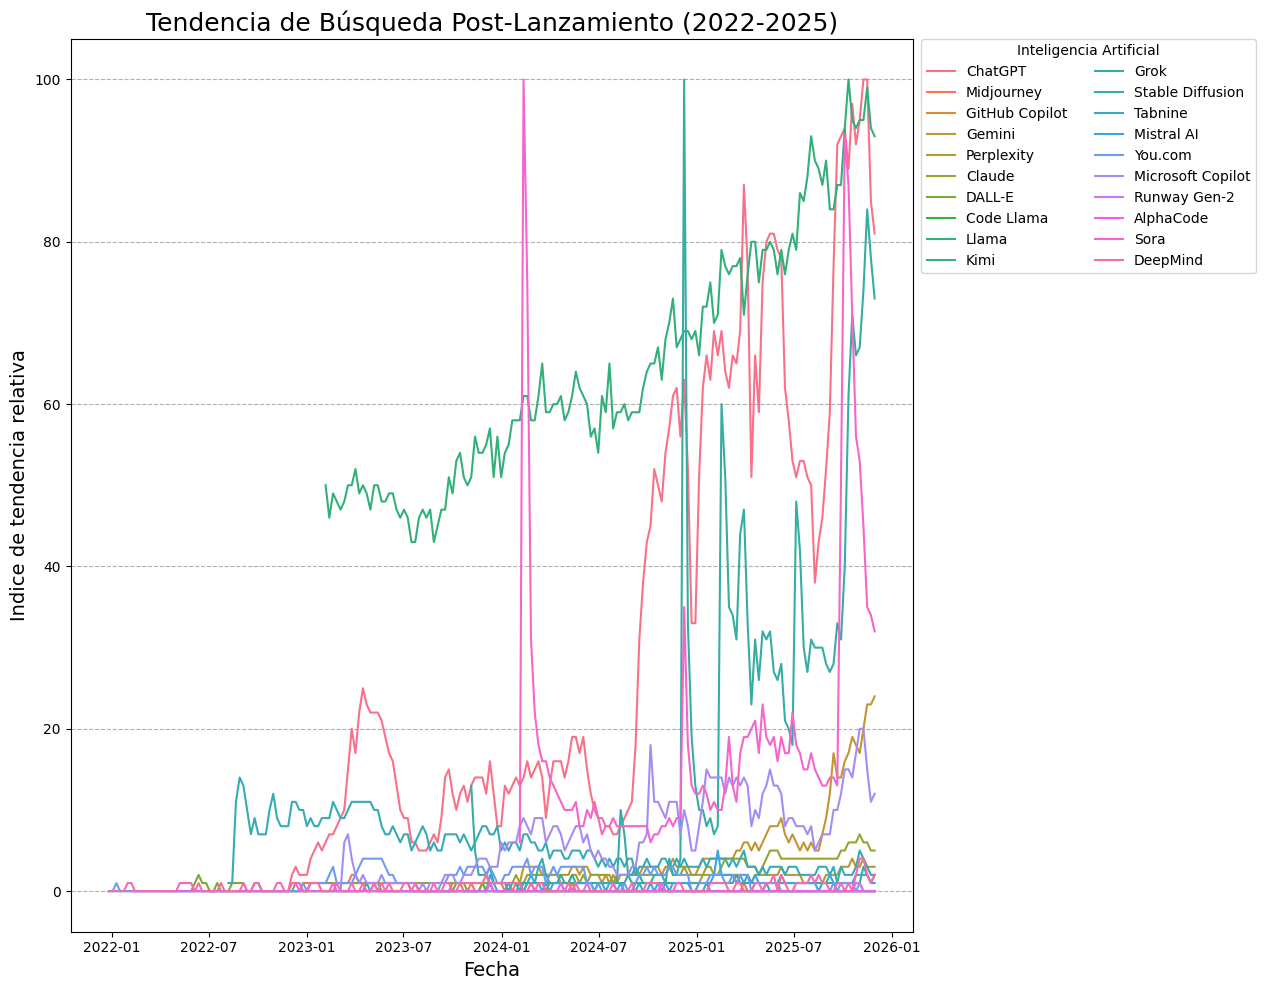

In [11]:
### Visualización

# Tendencias históricas post-lanzamiento (20 series)
plt.figure(figsize=(16, 10))
sns.lineplot(data=df_filtrado, x='fecha', y='tendencia', hue='ia', linewidth=1.5)
plt.title('Tendencia de Búsqueda Post-Lanzamiento (2022-2025)', fontsize=18)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Indice de tendencia relativa', fontsize=14)
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0, title='Inteligencia Artificial', ncol=2)
plt.grid(axis='y', linestyle='--')
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.savefig('../reportes/tendencias_hist_post_lanz.png')
plt.show()

C:\Users\carlos\AppData\Local\Temp\ipykernel_1484\3377587393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crecimiento_post_lanz, y='ia', x='crecimiento_ratio', palette='turbo')


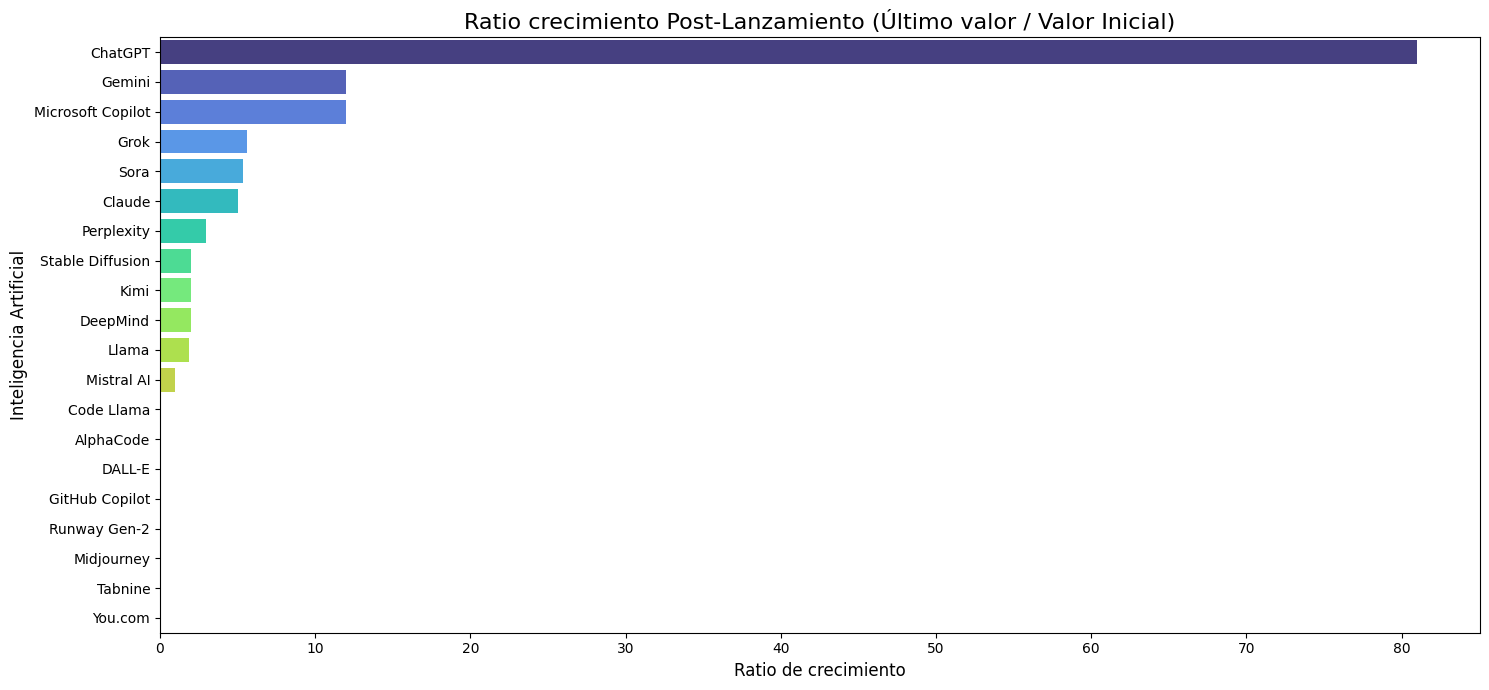

In [15]:
# Ranking de crecimiento
plt.figure(figsize=(15, 7))
sns.barplot(data=crecimiento_post_lanz, y='ia', x='crecimiento_ratio', palette='turbo')
plt.title('Ratio crecimiento Post-Lanzamiento (Último valor / Valor Inicial)', fontsize=16)
plt.xlabel('Ratio de crecimiento', fontsize=12)
plt.ylabel('Inteligencia Artificial', fontsize=12)
plt.tight_layout()
plt.savefig('../reportes/ranking_crecimiento_post_lanz.png')
plt.show()